In [ ]:

| pvm         | data        | tekijä   |
| ---------   | -------     | -------- |
| 2019-02-19  | [Yleisen asumistuen saajaruokakunnat, keskimääräiset tuet, asumismenot ja ruokakunnan tulot](https://beta.avoindata.fi/data/fi/dataset/kelan-yleisen-asumistuen-saajat) | Markus Kainu |
 
# Käyttöesimerkkejä: Yleisen asumistuen saajaruokakunnat, keskimääräiset tuet, asumismenot ja ruokakunnan tulot

## Resurssien lataaminen

In [1]:
from ckanapi import RemoteCKAN
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from pandas.io.json import json_normalize

ua = 'avoindata_ckanapi_example/1.0 ({0})'
ckan = RemoteCKAN('https://beta.avoindata.fi/data/fi/', user_agent=ua)
packages = ckan.action.package_search(q='Kansaneläkelaitos', fq = 'title:yleisen')
resources = packages['results'][0]['resources'] 
url_csv = resources[0]['url']
url_json = resources[1]['url']
dat = pd.read_csv(url_csv, sep = ';', decimal = ',')

In [2]:
response = urlopen(url_json)
meta = json.loads(response.read())

## Datan ja metadatan kuvailu

**Datan kuvaustieto**

In [5]:
print(meta['description'])

Yleistä asumistukea saaneet ruokakunnat tilastointikuukauden aikana sekä heidän keskimääräinen asumistuki, asumismenot ja asumistukitulot kuukaudessa. Raportille on laskettu ruokakunnan asumismenojen osuus asumistukeen vaikuttaneista tuloista ennen asumistukea sekä asumistuen jälkeen. Lisäksi raportilla on tiedot yleisen asumistuen saajien keskimääräisestä asunnon pinta-alasta ja asumismenoista pinta-alaneliötä kohden. Ruokakunnan elämäntilanne on päätelty vuoden 2015 tiedoista alkaen ruokakunnan tulojen mukaan ja yksi ruokakunta tilastoituu aina yhteen elämäntilanneluokkaan. Vuosien 2007–2014 tiedoissa ruokakunnan elämäntilanne on päätelty erikseen hakijan ja puolison tulojen mukaan, ja sama ruokakunta voi tilastoitua kahteen eri elämäntilanneluokkaan.


**Datan muuttujatieto**

In [6]:
json_normalize(meta['resources'][0]['schema']['fields'])

,format,name,title,type
0,default,kunta,Kuntanimi eli tekstiä,string
1,default,vuosi,Vuosi on kokonaisluku,integer
2,default,ruokakuntatyyppi,Ruokakuntatyyppi on tekstiä,string
3,default,saajaruokakunnat,Saajaruokakuntien määrä on kokonaisluku,integer
4,default,asumistuki_keskim_euroa_kk,Euromääräinen eli numeric R:ssä ja float Pytho...,number
5,default,asumismenot_keskim_euroa_kk,Euroja eli numeric,number
6,default,asumistukitulo_keskim_euroa_kk,Euroja eli numeric,number
7,default,asumismenot_ennen_asumistukea_pros,Prosenttia eli numeric,number
8,default,asumismenot_asumistuen_jalkeen_pros,Prosenttia eli numeric,number
9,default,asumismenot_keskim_e_m2_kk,Euroja eli numeric,number


**Datan ensimmäiset rivit**

In [7]:
print(dat.head())

  kunta  vuosi          ruokakuntatyyppi  saajaruokakunnat  \
0  Akaa   2018                  Yhteensä             604.0   
1  Akaa   2018              Yksin asuvat             379.0   
2  Akaa   2018         Lapsettomat parit              27.0   
3  Akaa   2018     Lapsiperheet yhteensä             184.0   
4  Akaa   2018  Kahden huoltajan perheet              38.0   

   asumistuki_keskim_euroa_kk  asumismenot_keskim_euroa_kk  \
0                    279.6358                     541.5889   
1                    233.7341                     450.0426   
2                    268.8667                     600.0330   
3                    378.4205                     719.4155   
4                    387.5579                     851.2903   

   asumistukitulo_keskim_euroa_kk  asumismenot_ennen_asumistukea_pros  \
0                        966.7248                              56.023   
1                        671.6300                              67.008   
2                       1209.0970  

In [8]:
plotdat = (dat
 .query('vuosi == 2018')
 .query('ruokakuntatyyppi == "Yhteensä"')
 .sort_values(by='asumistuki_keskim_euroa_kk', ascending=False)
 .head(20))

#plt.bar(plotdat, height = )

## Kuvio

<BarContainer object of 20 artists>

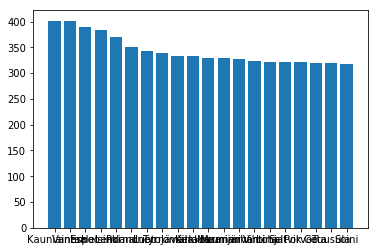

In [9]:
plt.bar(plotdat['kunta'], plotdat['asumistuki_keskim_euroa_kk'])

## Datastore-api

Jos et tarvitse koko aineistoa, voit suodattaa siitä osio SQL:llä käyttäen CKAN:n DataStore-rajapintaa.

Alla olevassa esimerkissä tehdään rajaus `kunta`-muuttujasta ja siis etsitään vaan kuntaa *Veteli* koskevat tiedot.

In [10]:
kunta = "Veteli"
taulu = resources[0]['id']
muuttuja = 'kunta'
urli = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}" WHERE {muuttuja} LIKE \'{kunta}\''
urli_plain = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}"'
#urli = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\" WHERE %s LIKE '%s'" % (taulu, muuttuja, kunta)
#urli_plain = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\"" % (taulu)
response = urlopen(urli_plain)
da = json.loads(response.read())
dataa = json_normalize(da['result']['records'])
#dataa
print(dataa.head())

                                          _full_text  _id  \
0  '023':12 '097':14 '1049':16 '2018':2 '27':13 '...    1   
1  '008':13 '0426':9 '2018':2 '207':15 '233':6 '3...    2   
2  '0330':9 '0970':11 '1209':10 '2018':2 '268':6 ...    3   
3  '1516':10 '184':5 '2018':2 '22':14 '266':19 '3...    4   
4  '095':16 '20':15 '2018':2 '2307':11 '2903':10 ...    5   

  asumismenot_asumistuen_jalkeen_pros asumismenot_ennen_asumistukea_pros  \
0                              27,097                             56,023   
1                              32,207                             67,008   
2                              27,390                             49,627   
3                              22,482                             47,431   
4                              20,095                             36,890   

  asumismenot_keskim_e_m2_kk asumismenot_keskim_euroa_kk  \
0                     9,1049                    541,5889   
1                     9,4712                    450,0426